In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [54]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [15]:
print(f"Training images: {train_images.shape},\nTraining labels shape: {train_labels.shape}")
print(f"Testing images : {test_images.shape},\nTesting labels shape: {test_labels.shape}")
print(f"Each Image size: {train_images[0].shape}")

Training images: (60000, 28, 28),
Training labels shape: (60000,)
Testing images : (10000, 28, 28),
Testing labels shape: (10000,)
Each Image size: (28, 28)


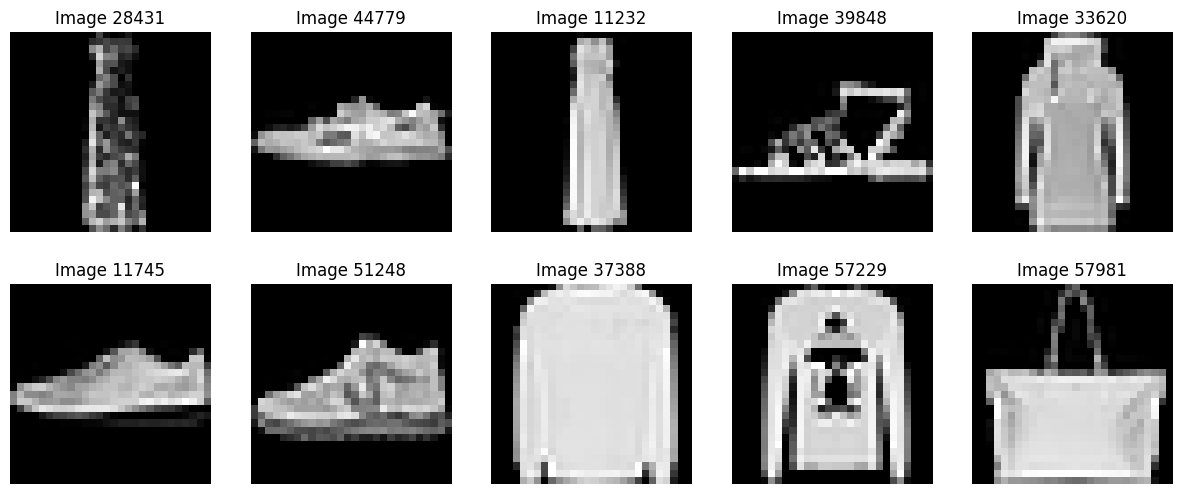

In [16]:
random_indices = np.random.choice(len(train_images), 10, replace=False)

plt.figure(figsize=(15, 6))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Image {index}")
    plt.axis('off')

plt.show()

In [17]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [19]:
train_labels = np.argmax(to_categorical(train_labels),axis=1)
test_labels = np.argmax(to_categorical(test_labels),axis=1)

In [20]:
model_fnn = Sequential([
        Dense(128, activation = 'relu',input_shape=(28,28)),
        Dense(64, activation = 'relu'),
        Flatten(),
        Dense(10, activation = 'softmax')
])

In [21]:
model_fnn.compile(optimizer="Adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [23]:
history1 = model_fnn.fit(train_images,train_labels,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8846 - loss: 0.3159
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8928 - loss: 0.2958
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8988 - loss: 0.2756
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9039 - loss: 0.2623
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9046 - loss: 0.2565
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9126 - loss: 0.2388
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9163 - loss: 0.2318
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9198 - loss: 0.2213


In [37]:
predictions_fnn = model_fnn.evaluate(test_images,test_labels)
print(f"FNN Model Loss: {round(predictions_fnn[0],2)}")
print(f"FNN Model Accuracy: {round(predictions_fnn[1],2)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8861 - loss: 0.3332
FNN Model Loss: 0.34
FNN Model Accuracy: 0.88


In [46]:
train_loss = history1.history['loss']
train_acc = history1.history['accuracy']

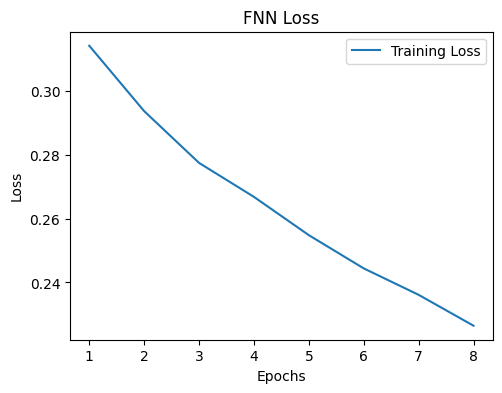

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,9),train_loss,label="Training Loss")
plt.title("FNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

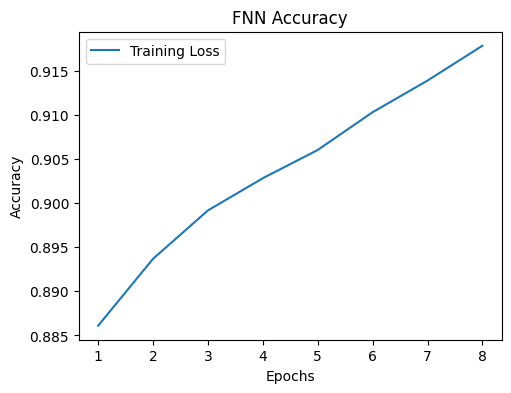

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(range(1,9),train_acc,label="Training Accuracy")
plt.title("FNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [32]:
model_cnn = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [33]:
model_cnn.compile(optimizer="Adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [34]:
history2 = model_cnn.fit(train_images,train_labels,epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.7704 - loss: 0.6343
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8814 - loss: 0.3271
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 32ms/step - accuracy: 0.8987 - loss: 0.2672
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9095 - loss: 0.2395
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9172 - loss: 0.2192
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9264 - loss: 0.1942
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9354 - loss: 0.1735
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9378 - loss: 0.1611


In [36]:
predictions_cnn = model_cnn.evaluate(test_images,test_labels)
print(f"FNN Model Loss: {round(predictions_cnn[0],2)}")
print(f"FNN Model Accuracy: {round(predictions_cnn[1],2)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9101 - loss: 0.2711
FNN Model Loss: 0.27
FNN Model Accuracy: 0.91


In [47]:
train_loss_cnn = history2.history['loss']
train_acc_cnn = history2.history['accuracy']

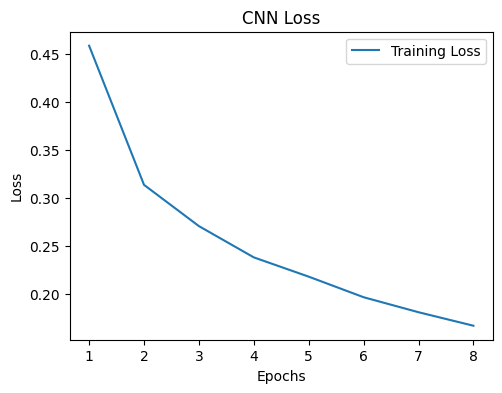

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,9),train_loss_cnn,label="Training Loss")
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

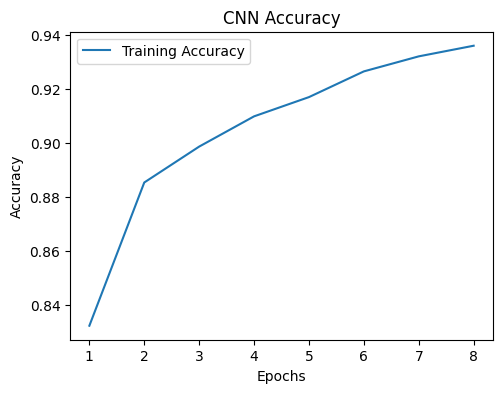

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,9),train_acc_cnn,label="Training Accuracy")
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()